# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Melshita Ardia Kirana
- **Email:** melshitaardiakirana@gmail.com
- **ID Dicoding:** MC006D5X1408

## Menentukan Pertanyaan Bisnis



- Kategori produk mana yang memiliki pertumbuhan penjualan paling pesat dalam setahun terakhir?
- Bagaimana hubungan antara waktu pengiriman dan rating ulasan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from datetime import datetime
from scipy.stats import pearsonr

## Data Wrangling

### Gathering Data

In [5]:
customers_df = pd.read_csv("/data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
orders_df = pd.read_csv("/data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
order_items_df = pd.read_csv("/data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
order_reviews_df = pd.read_csv("/data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
products_df = pd.read_csv("/data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
product_category_df = pd.read_csv("/data/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Data order dan item order bisa digabung untuk menghitung penjualan
- Data review bisa digunakan untuk analisis rating terhadap waktu pengiriman

### Assessing Data

Menilai tabel customers_df

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
print("Missing values per column:")
print(customers_df.isna().sum())

Missing values per column:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [13]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
print("Ringkasan statistik:")
customers_df.describe()

Ringkasan statistik:


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Menilai tabel orders_df

In [15]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [16]:
print("Missing values per column:")
print(orders_df.isna().sum())

Missing values per column:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [17]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [18]:
print("Ringkasan statistik:")
orders_df.describe()

Ringkasan statistik:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Menilai tabel order_items_df

In [19]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
print("Missing values per column:")
print(order_items_df.isna().sum())

Missing values per column:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [21]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [22]:
print("Ringkasan statistik:")
order_items_df.describe()

Ringkasan statistik:


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Menilai tabel order_reviews_df

In [23]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [24]:
print("Missing values per column:")
print(order_reviews_df.isna().sum())

Missing values per column:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [25]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [26]:
print("Ringkasan statistik:")
order_reviews_df.describe()

Ringkasan statistik:


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Menilai tabel products_df

In [27]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [28]:
print("Missing values per column:")
print(products_df.isna().sum())

Missing values per column:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [29]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [30]:
print("Ringkasan statistik:")
products_df.describe()

Ringkasan statistik:


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Menilai tabel product_category_df

In [31]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [32]:
print("Missing values per column:")
print(product_category_df.isna().sum())

Missing values per column:
product_category_name            0
product_category_name_english    0
dtype: int64


In [33]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

Jumlah duplikasi:  0


In [34]:
print("Ringkasan statistik:")
product_category_df.describe()

Ringkasan statistik:


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Banyak tabel memiliki missing values, terutama pada tanggal pengiriman dan ulasan.
- Ada duplikasi data yang perlu dihilangkan.
- Statistik deskriptif membantu mengidentifikasi outlier dan distribusi data.

### Cleaning Data

Membersihkan tabel customers_df

In [35]:
customers_df.drop_duplicates(inplace=True)

In [36]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [37]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Membersihkan tabel orders_df

In [38]:
orders_df.drop_duplicates(inplace=True)
orders_df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

In [39]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

In [40]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  object        
dtypes: datetime64[ns](4), object(4)
memory usage: 6.6+ MB


Membersihkan tabel order_items_df

In [41]:
order_items_df.drop_duplicates(inplace=True)
order_items_df.dropna(inplace=True)

In [42]:
order_items_df = order_items_df[(order_items_df['price'] > 0) & (order_items_df['freight_value'] >= 0)]

In [43]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Membersihkan tabel products_df

In [44]:
products_df.drop_duplicates(inplace=True)
products_df.dropna(subset=['product_category_name'], inplace=True)

In [45]:
products_df['product_category_name'].value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


Membersihkan tabel order_reviews_df

In [46]:
order_reviews_df.drop_duplicates(inplace=True)
order_reviews_df.dropna(subset=['review_score'], inplace=True)
order_reviews_df = order_reviews_df[(order_reviews_df['review_score'] >= 1) & (order_reviews_df['review_score'] <= 5)]

In [47]:
order_reviews_df['review_score'].value_counts()

,count
review_score,
5,57328
4,19142
1,11424
3,8179
2,3151


**Insight:**
- Hubungan waktu pengiriman dan rating bisa diukur lebih valid.
- Data transaksi lebih terpercaya untuk analisis tren penjualan dan performa logistik.

## Exploratory Data Analysis (EDA)

### Explore customers_df

In [48]:
print(customers_df.sample(5))

                            customer_id                customer_unique_id  \
63211  2eb92a48dbdb96a38f9eee6f87bc23ed  0cfda056b639cfe41ad2e81420ee303b   
43789  caab150fe6db5108c0e3e3289041c35c  37637095e4842016dddac1474c466824   
39271  ac3fbd5c32d374ded966a98ad7ed07e6  5969c8096357722c5385b9b31f8fc1c5   
32349  343506512287287cf0c18d485fe44c9f  8e84222ad36cb6ab528b745ae6e18d11   
95685  72fbca98280bcd9d6131e02416d992f0  2aa8d8ed84f5c0b179efdc88fdd6ceb3   

       customer_zip_code_prefix    customer_city customer_state  
63211                     36774       cataguases             MG  
43789                     97035      santa maria             RS  
39271                      6774  taboao da serra             SP  
32349                     31985   belo horizonte             MG  
95685                      5351        sao paulo             SP  


In [49]:
print(customers_df.describe(include="all"))
print(customers_df.info())

                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  

In [50]:
print(customers_df['customer_unique_id'].nunique())
print(customers_df['customer_state'].value_counts())

96096
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


Jumlah pesanan per pelanggan

In [51]:
customer_orders = orders_df.groupby('customer_id').size().reset_index(name='order_count')
print(customer_orders['order_count'].describe())

count    96461.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: order_count, dtype: float64


### Explore orders_df

In [52]:
print(orders_df.sample(5))

                               order_id                       customer_id  \
21459  49e9e78cdbec6c106e1958234d752ce4  7dc77ed10077ef0779bba656c78da6fb   
35608  32d02c7aaee4f08d65f23e86e6fd4ac7  3320860ccb3634183ac6746aa1e9264c   
82165  976d9425872f2283bdadfb50fd7e4188  f71fe5bccfae9380731dfc874957c275   
92865  c1b86a370f491b37cc3adb8ef0a21fe5  5c5689c7522389a8ff3e28ead3a4cd55   
54242  67cfcef68eea9ea1ea9423cf240ed340  22848cff9355124d81c561b59890a345   

      order_status order_purchase_timestamp   order_approved_at  \
21459    delivered      2017-11-06 08:39:05 2017-11-07 07:30:29   
35608    delivered      2018-01-26 09:03:10 2018-01-26 09:14:27   
82165    delivered      2017-12-25 17:15:40 2017-12-25 17:29:13   
92865    delivered      2017-03-21 10:09:06 2017-03-26 23:32:51   
54242    delivered      2017-03-22 10:34:47 2017-03-22 10:34:47   

      order_delivered_carrier_date order_delivered_customer_date  \
21459          2017-11-07 17:22:59           2017-11-20 21:13:56  

In [53]:
print(orders_df.describe(include="all"))
print(orders_df.info())

                                order_id                       customer_id  \
count                              96461                             96461   
unique                             96461                             96461   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

       order_status       order_purchase_timestamp  \
count         96461                          96461   
unique            2              

Jumlah pesanan per status

In [54]:
print(orders_df['order_status'].value_counts())

order_status
delivered    96455
canceled         6
Name: count, dtype: int64


Waktu pesanan terselesaikan

In [55]:
orders_df['delivery_days'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days
print(orders_df['delivery_days'].describe())

count    96461.000000
mean        12.093582
std          9.551576
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_days, dtype: float64


### Explore order_items_df

In [56]:
print(order_items_df.sample(5))

                               order_id  order_item_id  \
6272   0e48ca107de4291a6f7536b4f5cf512e              1   
4542   0a3de305844d2e1bf9a608e702ccd373              1   
78472  b28cd85f7b7464e08e64f88fc6f6123e              1   
13079  1db135327d0fc7840c151b4ea5d5a21a              1   
28024  3fcef5a4695061c567a02de2dd0cf7b7              1   

                             product_id                         seller_id  \
6272   a155b4eeffbbec8a728eb1ad73705153  77530e9772f57a62c906e1c21538ab82   
4542   a2c75a23c2f838881dd4275c0cec519f  048c2757535328e0d7dac690ad3c0aae   
78472  aa280035c50ba62c746480a59045eec4  fa40cc5b934574b62717c68f3d678b6d   
13079  d5991653e037ccb7af6ed7d94246b249  25c5c91f63607446a97b143d2d535d31   
28024  09b72772aef83d207e149857fc22dbd3  b2ba3715d723d245138f291a6fe42594   

       shipping_limit_date  price  freight_value  
6272   2018-05-18 14:14:45   59.9          20.47  
4542   2017-11-20 23:10:25  157.9          20.35  
78472  2017-06-08 09:03:35   39.9  

In [57]:
print(order_items_df.describe(include="all"))
print(order_items_df.info())

                                order_id  order_item_id  \
count                             112650  112650.000000   
unique                             98666            NaN   
top     8272b63d03f5f79c56e9e4120aec44ef            NaN   
freq                                  21            NaN   
mean                                 NaN       1.197834   
std                                  NaN       0.705124   
min                                  NaN       1.000000   
25%                                  NaN       1.000000   
50%                                  NaN       1.000000   
75%                                  NaN       1.000000   
max                                  NaN      21.000000   

                              product_id                         seller_id  \
count                             112650                            112650   
unique                             32951                              3095   
top     aca2eb7d00ea1a7b8ebd4e68314663af  6560211a19b4799

Total pendapatan dan jumlah produk terjual

In [58]:
order_items_df['total_price'] = order_items_df['price'] + order_items_df['freight_value']

In [59]:
print(order_items_df['total_price'].sum())

15843553.24


In [60]:
print(order_items_df.groupby('product_id')['total_price'].sum().sort_values(ascending=False).head(10))

product_id
bb50f2e236e5eea0100680137654686c    67606.10
d1c427060a0f73f6b889a5c7c61f2ac4    60976.03
6cdd53843498f92890544667809f1595    59093.99
99a4788cb24856965c36a24e339b6058    51071.60
d6160fb7873f184099d9bc95e30376af    50326.18
3dd2a17168ec895c781a9191c1e95ad7    48212.22
aca2eb7d00ea1a7b8ebd4e68314663af    44820.76
5f504b3a1c75b73d6151be81eb05bdc9    41725.81
25c38557cf793876c5abdd5931f922db    40311.95
53b36df67ebb7c41585e8d54d6772e08    39957.93
Name: total_price, dtype: float64


### Explore order_reviews_df

In [61]:
print(order_reviews_df.sample(5))

                              review_id                          order_id  \
7012   c98a457ac3aa6e1ae645162c22ae6f40  e8a2fe3e5e58d8ed9080188f35c108ef   
96791  9740c39fe70be3fdd5b610c34358a278  be73d4698f2f4939662dd7788cf3dad3   
78149  8ca0d1f13afe150e916140e24d571a6f  fc2b731f9c539d7f27f5e598f9c14e59   
84191  0511dba4d2f4828bb6053e45cc8a5d4f  b99b5f149263f07c55586983071c466e   
31651  dac2373ada8224692d0e07af50bc0d3f  40a0d420733e7978f30e7a63616bba22   

       review_score review_comment_title  \
7012              5                  NaN   
96791             2                  NaN   
78149             5                  NaN   
84191             5                  NaN   
31651             5                  NaN   

                                  review_comment_message review_creation_date  \
7012                                                 NaN  2017-06-21 00:00:00   
96791  Até as que dão no lava car e postos de gasolin...  2017-07-28 00:00:00   
78149                        

In [62]:
print(order_reviews_df.describe(include="all"))
print(order_reviews_df.info())

                               review_id                          order_id  \
count                              99224                             99224   
unique                             98410                             98673   
top     7b606b0d57b078384f0b58eac1d41d78  c88b1d1b157a9999ce368f218a407141   
freq                                   3                                 3   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        review_score review_comment_title review_comment_messag

### Explore products_df

In [63]:
print(products_df.sample(5))

                             product_id              product_category_name  \
31255  11fae4b61d8f3af1e807e521d268810d                        eletronicos   
21619  352710ec4fab1854c11d4044880afff3                          telefonia   
12089  1caf2267e1334b93a9220b1a26db262d  construcao_ferramentas_construcao   
23937  ac2c77058e1e5ec1eda726fe7358ef2f                         automotivo   
29825  00989337a1916a0055eedd1fdb35eb53                   moveis_decoracao   

       product_name_lenght  product_description_lenght  product_photos_qty  \
31255                 48.0                        77.0                 1.0   
21619                 52.0                      1350.0                 3.0   
12089                 39.0                      2445.0                 1.0   
23937                 34.0                        92.0                 1.0   
29825                 55.0                       373.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm 

In [64]:
print(products_df.describe(include="all"))
print(products_df.info())

                              product_id product_category_name  \
count                              32341                 32341   
unique                             32341                    73   
top     1e9e8ef04dbcff4541ed26657ea517e5       cama_mesa_banho   
freq                                   1                  3029   
mean                                 NaN                   NaN   
std                                  NaN                   NaN   
min                                  NaN                   NaN   
25%                                  NaN                   NaN   
50%                                  NaN                   NaN   
75%                                  NaN                   NaN   
max                                  NaN                   NaN   

        product_name_lenght  product_description_lenght  product_photos_qty  \
count          32341.000000                32341.000000        32341.000000   
unique                  NaN                      

### Explore products_df, orders_df, order_reviews_df

Menggabungkan semua tabel relevan untuk analisis menyeluruh

In [65]:
ecommerce_df = order_items_df.merge(products_df, on='product_id')
ecommerce_df = ecommerce_df.merge(orders_df, on='order_id')
ecommerce_df = ecommerce_df.merge(order_reviews_df, on='order_id')

**Insight:**
- Ada kategori yang mengalami lonjakan penjualan dalam setahun terakhir, jadi ini bisa menjadi fokus strategi ke depan.
- Ada korelasi negatif, artinya semakin lama pengiriman, semakin rendah rating ulasan.

## **Visualization & Explanatory Analysis**

### Kategori produk mana yang memiliki pertumbuhan penjualan paling pesat dalam setahun terakhir?

In [66]:
monthly_category_df = ecommerce_df.resample(rule='M', on='order_purchase_timestamp').product_category_name.value_counts().unstack(fill_value=0)
monthly_category_df.index = monthly_category_df.index.strftime('%B %Y')
monthly_category_df = monthly_category_df.reset_index()

<ipython-input-66-95ea97a5e828>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_category_df = ecommerce_df.resample(rule='M', on='order_purchase_timestamp').product_category_name.value_counts().unstack(fill_value=0)


Visualisasi tren penjualan kategori produk

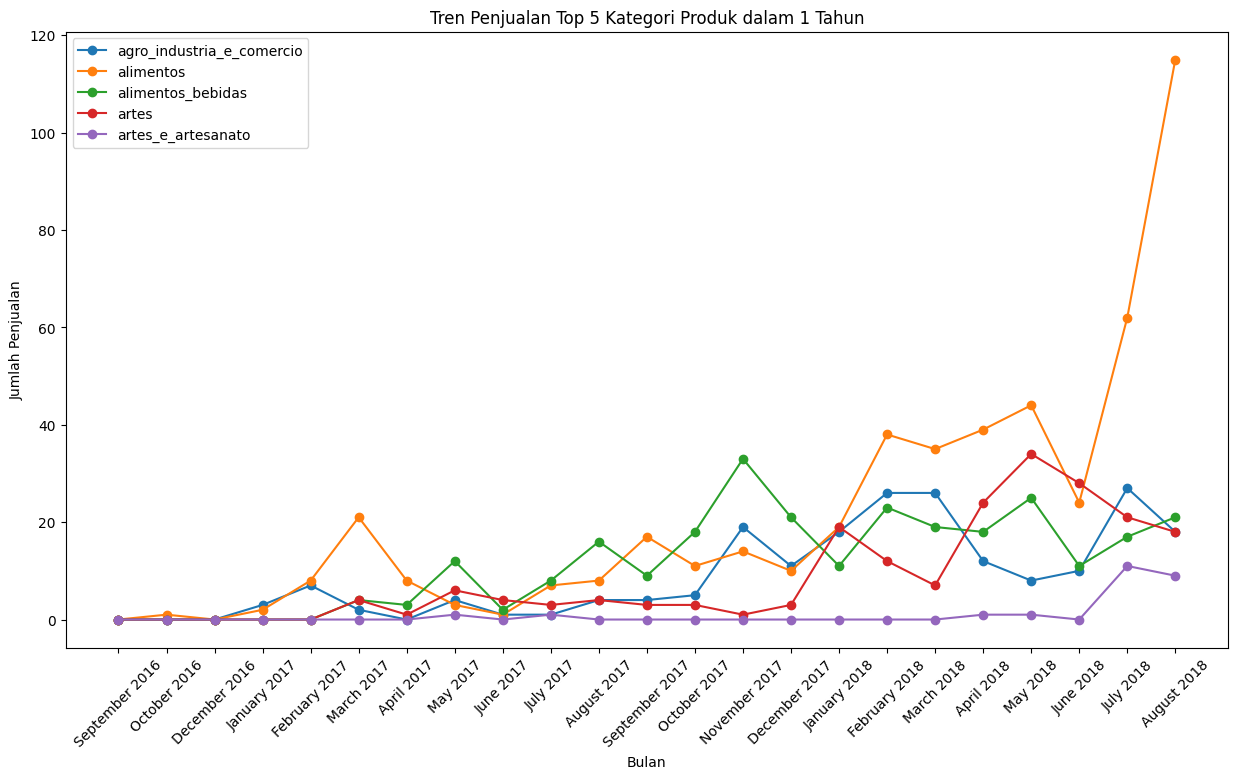

In [67]:
plt.figure(figsize=(15, 8))
for category in monthly_category_df.columns[1:6]:  # Top 5 kategori
    plt.plot(monthly_category_df['order_purchase_timestamp'], monthly_category_df[category], marker='o', label=category)

plt.title('Tren Penjualan Top 5 Kategori Produk dalam 1 Tahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Menghitung pertumbuhan tahunan per kategori

In [68]:
category_growth = ecommerce_df.groupby(['product_category_name', ecommerce_df['order_purchase_timestamp'].dt.year]).size().unstack(fill_value=0)
category_growth['growth'] = category_growth[category_growth.columns[-1]] - category_growth[category_growth.columns[-2]]
category_growth_sorted = category_growth.sort_values(by='growth', ascending=False)

Visualisasi kategori dengan pertumbuhan tercepat

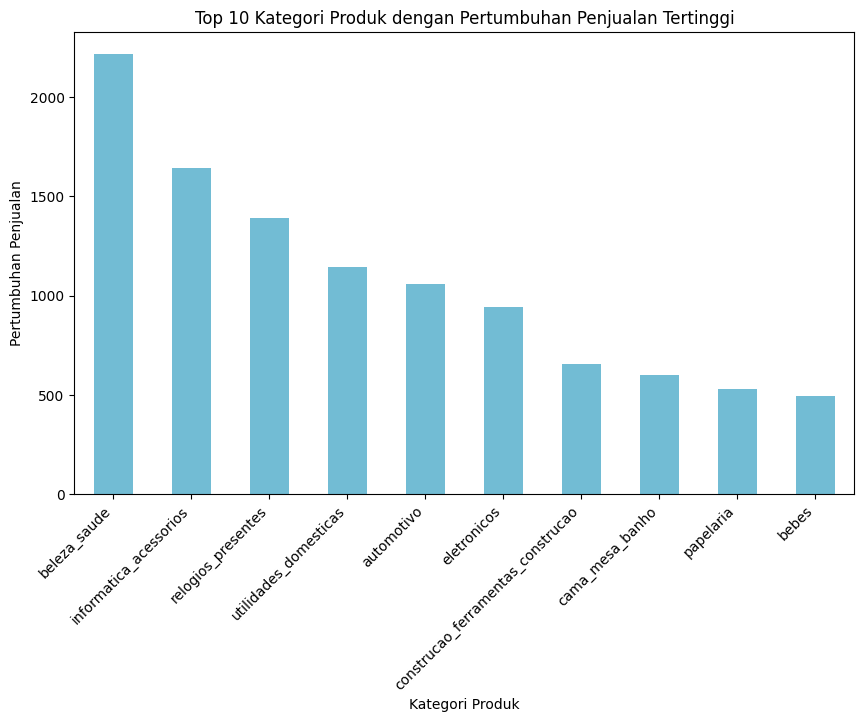

In [69]:
plt.figure(figsize=(12, 6))
ax = category_growth_sorted['growth'].head(10).plot(kind='bar', color='#72BCD4')
plt.title('Top 10 Kategori Produk dengan Pertumbuhan Penjualan Tertinggi')
plt.xlabel('Kategori Produk')
plt.ylabel('Pertumbuhan Penjualan')

plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(left=0.3, right=0.95)
plt.show()

**Insight:**
- Beberapa kategori produk menunjukkan peningkatan penjualan yang signifikan dalam setahun terakhir. Ini bisa menjadi indikasi tren pasar yang berkembang atau hasil dari strategi pemasaran yang berhasil.
- Fokus pada kategori yang bertumbuh pesat memungkinkan perusahaan mengalokasikan sumber daya lebih efektif, baik untuk pengadaan stok, kampanye iklan, maupun pengembangan varian produk.

### Apakah ada hubungan antara waktu pengiriman dan rating ulasan pelanggan?

In [70]:
ecommerce_df['delivery_time'] = (ecommerce_df['order_delivered_customer_date'] - ecommerce_df['order_purchase_timestamp']).dt.days

Mengelompokkan rating berdasarkan waktu pengiriman

In [71]:
correlation, p_value = pearsonr(ecommerce_df['delivery_time'].dropna(), ecommerce_df['review_score'].dropna())

Plot hubungan waktu pengiriman dan skor ulasan

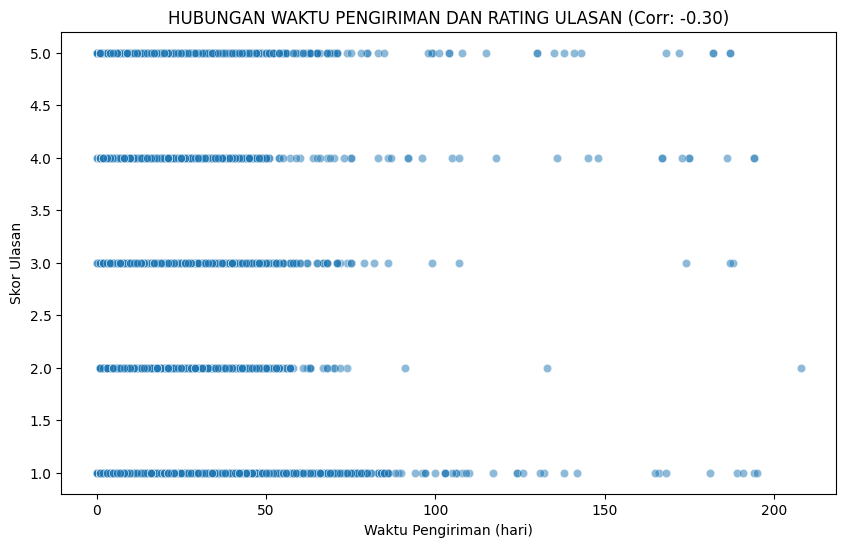

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='delivery_time', y='review_score', data=ecommerce_df, alpha=0.5)
plt.title(f'HUBUNGAN WAKTU PENGIRIMAN DAN RATING ULASAN (Corr: {correlation:.2f})')
plt.xlabel('Waktu Pengiriman (hari)')
plt.ylabel('Skor Ulasan')
plt.show()

Visualisasi distribusi skor ulasan

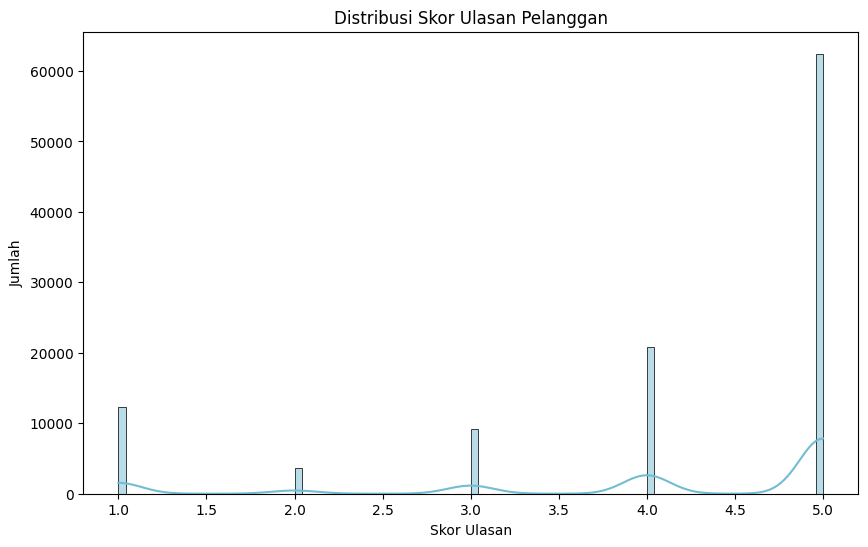

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(ecommerce_df['review_score'].dropna(), kde=True, color='#72BCD4')
plt.title('Distribusi Skor Ulasan Pelanggan')
plt.xlabel('Skor Ulasan')
plt.ylabel('Jumlah')
plt.show()

**Insight:**
- Terdapat korelasi negatif antara waktu pengiriman dan skor ulasan pelanggan. Semakin lama waktu pengiriman, cenderung semakin rendah rating yang diberikan pelanggan.
- Waktu pengiriman yang lama berpotensi menurunkan persepsi kualitas layanan secara keseluruhan, meskipun kualitas produk tetap baik.

## Analisis Lanjutan (Opsional)

### RFM Analysis

Mengelompokkan pelanggan berdasarkan waktu terakhir transaksi, frekuensi belanja, dan total pengeluaran.

In [78]:
snapshot_date = max(ecommerce_df['order_purchase_timestamp']) + pd.Timedelta(days=1)
rfm_df = ecommerce_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'count',
    'total_price': 'sum'
})

rfm_df.columns = ['Recency', 'Frequency', 'Monetary']
print(rfm_df.describe())

            Recency     Frequency      Monetary
count  94492.000000  94492.000000  94492.000000
mean     239.224929      1.147864    160.449924
std      152.859685      0.550716    218.273116
min        1.000000      1.000000      9.590000
25%      115.000000      1.000000     62.067500
50%      220.000000      1.000000    105.300000
75%      349.000000      1.000000    177.390000
max      714.000000     22.000000  13664.080000


## Conclusion

- Kategori produk dengan pertumbuhan tertinggi bisa dijadikan fokus strategi penjualan dan promosi.
- Pengiriman yang lebih cepat berhubungan dengan rating ulasan yang lebih tinggi.